Course: <span style="color:crimson"> Current and Future Trends in Extreme Weather </span> (EAS-G574 - Indiana University - Fall 2022) <br />
Instructor: <span style="color:crimson"> Prof. Travis O'Brien </span> <br />
Student: Trung Nguyen
<p style="text-align: center;">
<span style="color:blue"> GRAD Homework 1 </span> <br />
Setting up the lab environment <br />
Due: Tue Sep 13, 2022 11:59pm <br />
</p>

<span style="color:crimson"> Requirement:  </span>  <br />
* Make several plots of GEV distributions with different parameter settings <br />
* Within the notebook, using a Markdown cell, comment on what you observe  <br />

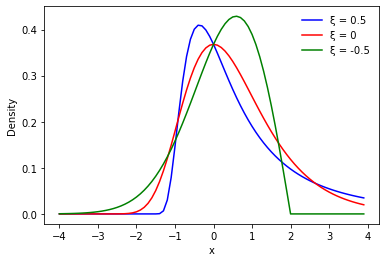

In [23]:
# Import packages : 
import numpy as np
import matplotlib.pyplot as plt

# Using genextreme from scipy 
from scipy.stats import genextreme

# The first plot: fixed location and scale with varying shape parameters
loc = 0
scale = 1
shape_l = [-0.5,0,0.5]

# Values for x
x = np.arange(-4, 4, 0.1)

# I like colors
colors=["b","r","g"]

# Plotting for all shape parameters
for i in np.arange(len(shape_l)) :
    y = genextreme.pdf(x, shape_l[i], loc, scale)
    lb = '\u03BE = '+str(-1*shape_l[i])
    # Interestingly, Note that several sources and software packages 
    # use the opposite convention for the sign of the shape parameter.
    plt.plot(x, y, label=lb, c=colors[i])

# Decoration
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

For the first plot, the simple example displayed in [1] is duplicated.
The above figure shows the PDFs of GEV distributions with three different shape parameters ($\xi$) of 0.5, 0 and -0.5 using the same location parameter ($\mu$) of 0 and scale parameter ($\sigma$) of 1.
The density curves changes from right-skew to left-skew as the $\xi$ changes from positive value to negative value.
The shape parameter controls the tail behavior of the distribution.
The sub-families defined by $\xi$=0, $\xi$>0 and $\xi$<0 are the Gumbel, Fréchet and Weibull distributions, respectively.
In addition, the "support" range of x (e.g., $x \in [ \mu - \sigma / \xi, \infty)$ when $\xi$ > 0) can be recognized.
The next plot exams the density curves with different scale parameters ($\sigma$) using fixed location and scale parameters.
As expected, when $\sigma$ increases the density curves are more "flat" (i.e. the data spreads out far way from the $\mu$ value).
More "interesting" plots should be considered after learning more about Extreme Value Theory from [2].

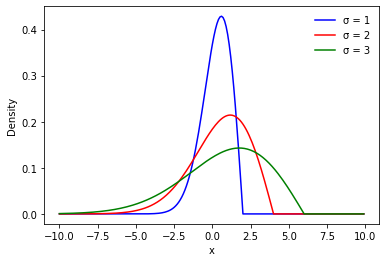

In [24]:
# Import packages same as above
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme

# The second plot: fixed location and shape with varying scale parameters
loc = 0
shape = 0.5
scale_l = [1,2,3]

# Values for x
x = np.arange(-10, 10, 0.1)

# I like colors
colors=["b","r","g"]

# Plotting for all scale parameters
for i in np.arange(len(scale_l)) :
    y = genextreme.pdf(x, shape, loc, scale_l[i])
    lb = '\u03C3 = '+str(scale_l[i])
    plt.plot(x, y, label=lb, c=colors[i])

# Decoration
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

<span style="color:crimson"> References  </span>  <br />
1. https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution
2. Stuart Coles. An Introduction to Statistical Modeling of Extreme Values (2001). Springer London. XIV, 209, https://doi.org/10.1007/978-1-4471-3675-0

<span style="color:crimson"> Appendix  </span>  <br />
* To be familiar with scipy.stats.genextreme : just following the instruction in https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html

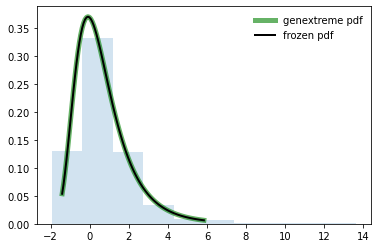

In [25]:
# Import packages
from scipy.stats import genextreme
import matplotlib.pyplot as plt
import numpy as np
#
fig, ax = plt.subplots(1, 1)
# With shape parameter "c"
c = -0.1
mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')
# Interestingly, using PPF 
x = np.linspace(genextreme.ppf(0.01, c),genextreme.ppf(0.99, c), 100)
ax.plot(x, genextreme.pdf(x, c),'g-', lw=5, alpha=0.6, label='genextreme pdf')
# "Frozen" ???
rv = genextreme(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
# Some random numbers
r = genextreme.rvs(c, size=1000)
# And histogram
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()